In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import acquire
import mytk

## Exercises

The end result of this exercise should be a Jupyter notebook named `model`.

Using [saas.csv](https://ds.codeup.com/saas.csv) or log data from API usage or store_item_sales

1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum. 
2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
    - Simple Average
    - Moving Average
    - Holt's Linear Trend Model
    - Based on previous year/month/etc., this is up to you.

Optional: Using store item demand

1. Predict 2018 total **monthly** sales for a single store and/or item by creating a model using prophet.
2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).
3. Plot the 2018 monthly sales predictions.

### 1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum. 


In [3]:
df = acquire.wrangle_zgulde()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [6]:
test = df.loc['2017']
test.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2017-01-01,27,18.0,481700,6,Morton,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,516 S Flores St,San Antonio,TX,78204,1,6,108.18
2017-01-01,39,36.0,695342,2,Munchies,Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk,9.02,28400029254,28400029254,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,6,324.72
2017-01-01,46,38.0,823162,2,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,6,176.70
2017-01-01,29,43.0,523698,1,Heinz,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,6,371.95
2017-01-01,35,66.0,636910,7,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,735 SW Military Dr,San Antonio,TX,78221,1,6,342.54


In [8]:
train = df.loc[:'2016']
train.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,2,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01,12,26.0,211817,1,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01,46,27.0,832657,1,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01,12,54.0,213643,3,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01,12,35.0,215469,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


In [16]:
x = train.resample('W').sum().sale_amount
x = x.dropna()
x.head()

sale_date
2013-01-06     91067.0
2013-01-13    103902.0
2013-01-20    102950.0
2013-01-27    103298.0
2013-02-03    109027.0
Freq: W-SUN, Name: sale_amount, dtype: float64

In [15]:
y = test.resample('W').sum().sale_amount
y = y.dropna()
y.head()

sale_date
2017-01-01     23709.0
2017-01-08    140112.0
2017-01-15    139901.0
2017-01-22    139914.0
2017-01-29    139345.0
Freq: W-SUN, Name: sale_amount, dtype: float64

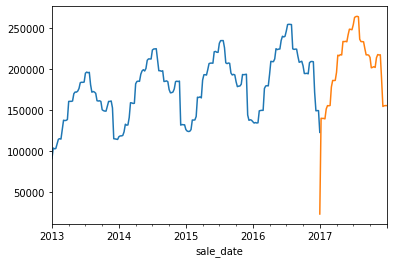

In [19]:
x.plot()
y.plot()
plt.show()

### 2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:


In [42]:
def plot_evals(x, y, pred):
    '''

    '''
    plt.figure(figsize = (12,4))
    plt.plot(x, label='Train', linewidth=1)
    plt.plot(y, label='Validate', linewidth=1)
    pred = pd.DataFrame(pred, index=y.index)
    plt.plot(pred, label='Predictions', linewidth=1.5)
    plt.show()

####     - Simple Average


In [34]:
simple_average = mytk.BaselineRegressor()
simple_average.fit(x)
pred = simple_average.predict(y)
simple_average.baseline

176893.64593301434

In [25]:
mytk.regression_metrics(y, pred)['root_mean_squared_error']

51073.82813034946

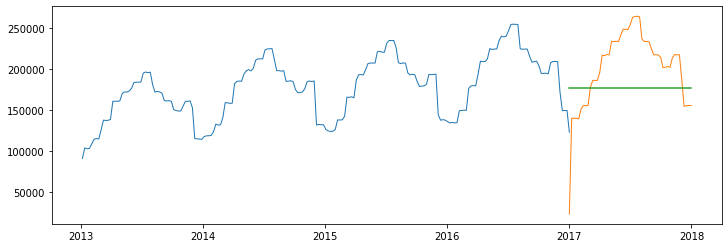

In [43]:
plot_evals(x, y, pred)

####     - Moving Average


In [26]:
x.rolling(7).mean()[-1]

165754.42857142858

In [44]:
moving_average = mytk.BaselineRegressor()
moving_average.baseline = x.rolling(7).mean()[-1]
moving_average.baseline

165754.42857142858

In [45]:
pred = moving_average.predict(y)
mytk.regression_metrics(y, pred)['root_mean_squared_error']

57477.0284739899

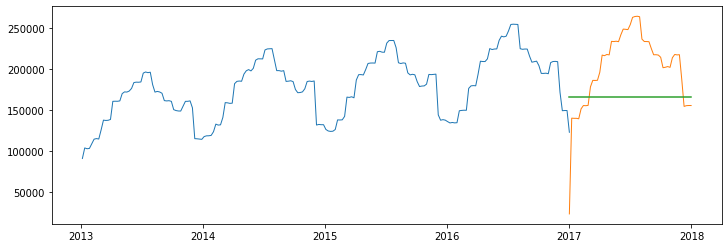

In [46]:
plot_evals(x, y, pred)

####     - Holt's Linear Trend Model


In [54]:
# holt's linear trend model. 
from statsmodels.tsa.api import Holt
model = Holt(x, exponential=False, damped_trend=True)
model = model.fit(optimized=True, smoothing_level=0.5, smoothing_trend=0.5)

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
y.index[0], y.index[-1]

(Timestamp('2017-01-01 00:00:00', freq='W-SUN'),
 Timestamp('2017-12-31 00:00:00', freq='W-SUN'))

In [56]:
pred = model.predict(start = y.index[0], end = y.index[-1])

In [57]:
mytk.regression_metrics(y, pred)['root_mean_squared_error']

426381.65031513444

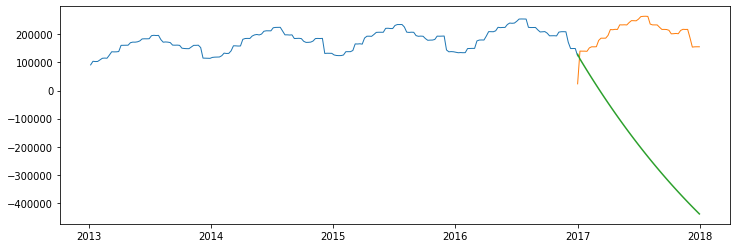

In [58]:
plot_evals(x, y, pred)

####     - Based on previous year/month/etc., this is up to you.



Optional: Using store item demand

1. Predict 2018 total **monthly** sales for a single store and/or item by creating a model using prophet.
2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).
3. Plot the 2018 monthly sales predictions.